In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame,Series
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
titanic_df = pd.read_csv('train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
# Q1 Who were the passengers on Titanic??
titanic_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [5]:
titanic_df.groupby('Sex')['Sex'].count()

Sex
female    314
male      577
Name: Sex, dtype: int64

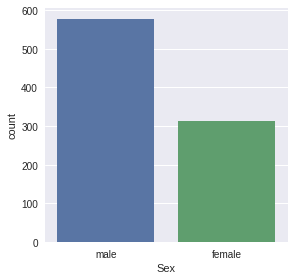

In [6]:
sns.factorplot('Sex',data=titanic_df,kind="count")
# shows that there are more male passengers as compared to female passangers

In [7]:
titanic_df.groupby('Pclass').count()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,216,216,216,216,186,216,216,216,216,176,214
2,184,184,184,184,173,184,184,184,184,16,184
3,491,491,491,491,355,491,491,491,491,12,491


In [8]:
# Distribution of males and females based on pclass and place of embarkment
titanic_df.groupby(['Pclass','Sex','Embarked']).size()

Pclass  Sex     Embarked
1       female  C            43
                Q             1
                S            48
        male    C            42
                Q             1
                S            79
2       female  C             7
                Q             2
                S            67
        male    C            10
                Q             1
                S            97
3       female  C            23
                Q            33
                S            88
        male    C            43
                Q            39
                S           265
dtype: int64

In [9]:
print titanic_df.groupby(['Pclass','Sex']).size()
print 
sex_age_df = pd.crosstab(index=[titanic_df['Pclass']], columns=[titanic_df['Sex']])
sex_age_df

Pclass  Sex   
1       female     94
        male      122
2       female     76
        male      108
3       female    144
        male      347
dtype: int64



Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


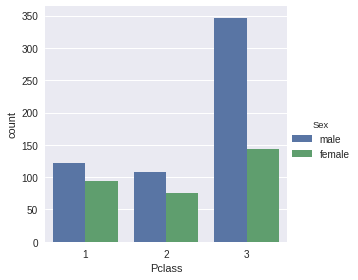

In [10]:
sns.factorplot('Pclass',data=titanic_df,kind='count',hue='Sex')

In [11]:
def male_female_child(passenger):
    age,sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex

In [12]:
titanic_df['Person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis = 1)

In [13]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


In [14]:
titanic_df.groupby(['Pclass','Person']).size()

Pclass  Person
1       child       6
        female     91
        male      119
2       child      19
        female     66
        male       99
3       child      58
        female    114
        male      319
dtype: int64

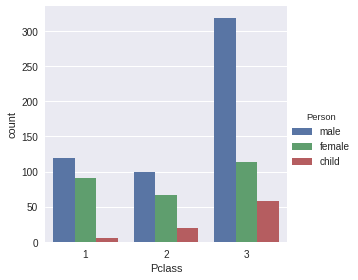

In [15]:
sns.factorplot('Pclass',data=titanic_df,kind='count',hue='Person')

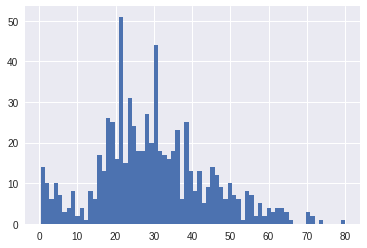

In [16]:
# Ages of people 
titanic_df['Age'].hist(bins = 70)
# Mean is around 30

In [17]:
titanic_df['Age'].mean()

29.69911764705882

In [18]:
titanic_df['Person'].value_counts()

male      537
female    271
child      83
Name: Person, dtype: int64

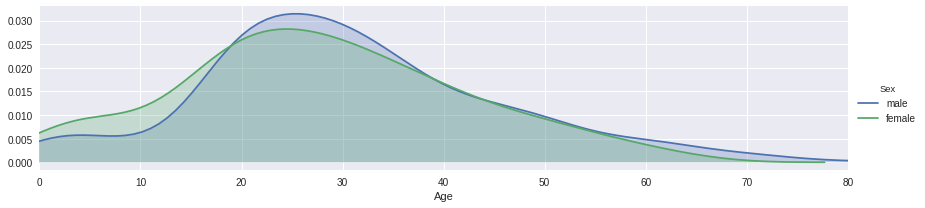

In [19]:
fig = sns.FacetGrid(titanic_df,hue='Sex',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))
fig.add_legend()

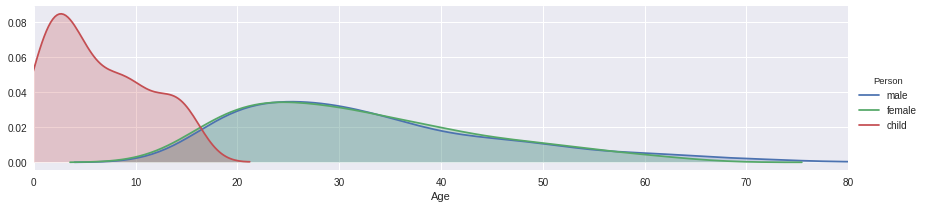

In [20]:
fig = sns.FacetGrid(titanic_df,hue='Person',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))
fig.add_legend()

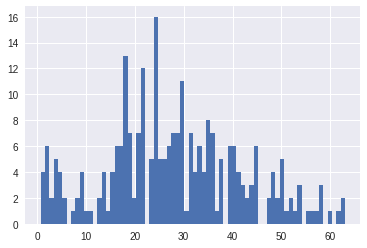

In [21]:
# Distribution of female ages
titanic_df[titanic_df['Sex'] == 'female']['Age'].hist(bins = 70)

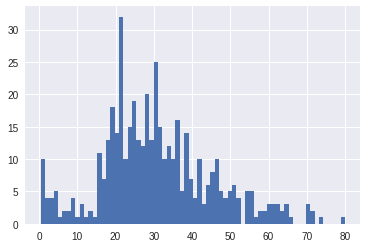

In [22]:
# Distribution of male ages
titanic_df[titanic_df['Sex'] == 'male']['Age'].hist(bins = 70)

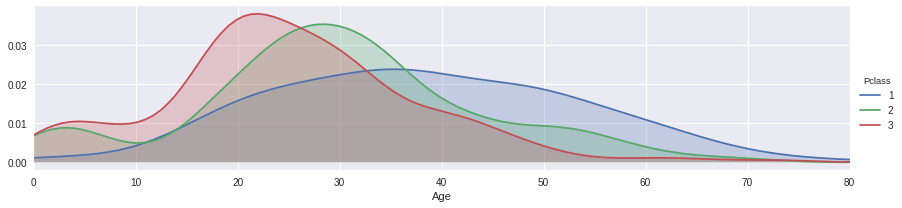

In [23]:
#How age is distributed w.r.t. to class
fig = sns.FacetGrid(titanic_df,hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))
fig.add_legend()

In [24]:
# Q2 What deck the passengers on and how does it relate to their class?
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [25]:
# Percentage of Null Values in all columns =
p_null= (len(titanic_df) - titanic_df.count())*100.0/len(titanic_df)
p_null

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
Person          0.000000
dtype: float64

In [26]:
# Percentage of Null Values in cabin column =
p_null_cabin= (len(titanic_df['Cabin']) - titanic_df['Cabin'].count())*100.0/len(titanic_df['Cabin'])
p_null_cabin

77.104377104377107

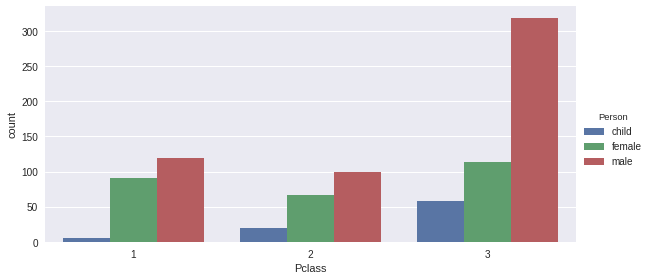

In [27]:
sns.factorplot('Pclass', data=titanic_df, kind='count', hue='Person', order=[1,2,3], 
               hue_order=['child','female','male'], aspect=2)

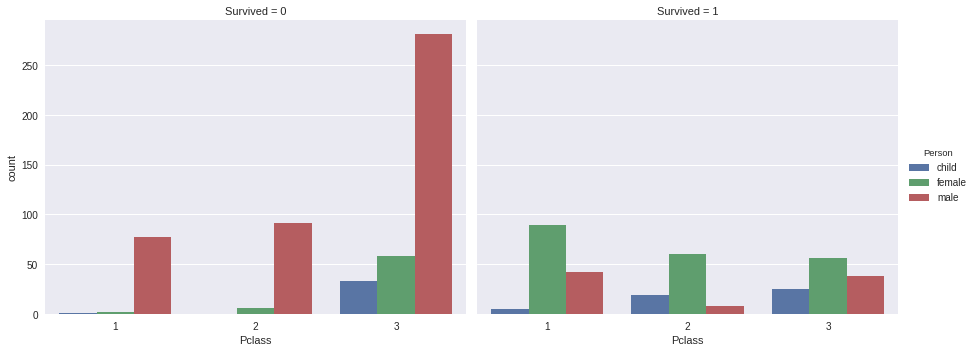

In [28]:
# Do the same as above, but split the passengers into either survived or not
sns.factorplot('Pclass', data=titanic_df, kind='count', hue='Person', col='Survived', order=[1,2,3], 
               hue_order=['child','female','male'], aspect=1.25, size=5)

# Where did the passengers come from i.e. Where did the passengers land into the ship from?

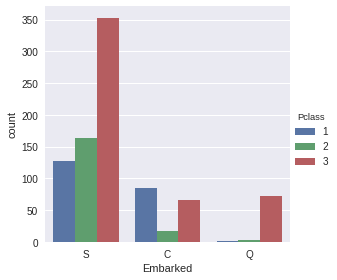

In [29]:
sns.factorplot('Embarked', data=titanic_df, kind='count', hue='Pclass')

From the figure above, one may conclude that almost all of the passengers who boarded from Queenstown were in third class. On the other hand, many who boarded from Cherbourg were in first class. The biggest portion of passengers who boarded the ship came from Southampton, in which 353 passengers were in third class, 164 in second class and 127 passengers were in first class. In such cases, one may need to look at the economic situation at these different towns at that period of time to understand why most passengers who boarded from Queenstown were in third class for example.

In [30]:
titanic_df.groupby(['Embarked','Pclass']).size()

Embarked  Pclass
C         1          85
          2          17
          3          66
Q         1           2
          2           3
          3          72
S         1         127
          2         164
          3         353
dtype: int64

In [31]:
titanic_df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [32]:
embarked_vs_pclass = pd.crosstab(index = [titanic_df['Embarked']], columns=[titanic_df['Pclass']],margins=True)
embarked_vs_pclass

Pclass,1,2,3,All
Embarked,,,,
C,85,17,66,168
Q,2,3,72,77
S,127,164,353,644
All,214,184,491,889


In [33]:
def alone_with_family(passenger):
    parch,sibsp = passenger
    if (parch == 0) & (sibsp == 0):
        return 'alone'
    else:
        return 'with_family'

In [34]:
titanic_df['alone_or_with_family'] = titanic_df[['Parch','SibSp']].apply(alone_with_family,axis = 1)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,alone_or_with_family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,with_family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,with_family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,with_family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,alone


In [35]:
titanic_df['alone_or_with_family'].value_counts()

alone          537
with_family    354
Name: alone_or_with_family, dtype: int64

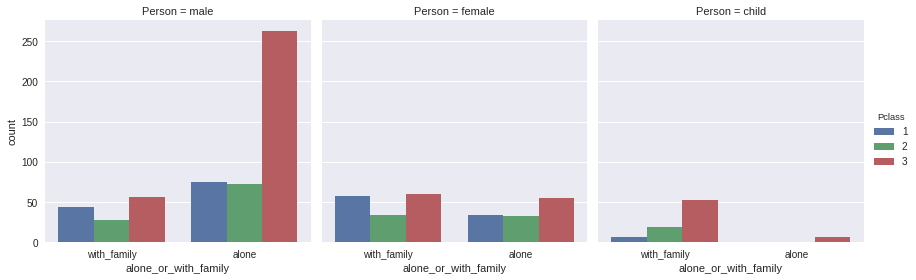

In [36]:
fg=sns.factorplot('alone_or_with_family', data=titanic_df, kind='count', hue='Pclass', col='Person')

In [37]:
pd.crosstab(index = [titanic_df['alone_or_with_family'],titanic_df['Person']], columns=[titanic_df['Pclass']],margins=True)

Pclass                         1    2    3  All
alone_or_with_family Person                    
alone                child     0    0    6    6
                     female   34   32   55  121
                     male     75   72  263  410
with_family          child     6   19   52   77
                     female   57   34   59  150
                     male     44   27   56  127
All                          216  184  491  891

In [38]:
def titanic_preprocessing(train, test):
    train_df = pd.read_csv(train)
    test_df = pd.read_csv(test)
    combine = [train_df, test_df]

    train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
    test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
    combine = [train_df, test_df]

    for dataset in combine:
        dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

    pd.crosstab(train_df['Title'], train_df['Sex'])

    for dataset in combine:
        dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
        'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

        dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
        dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
        dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

    train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    for dataset in combine:
        dataset['Title'] = dataset['Title'].map(title_mapping)
        dataset['Title'] = dataset['Title'].fillna(0)

    train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
    test_df = test_df.drop(['Name'], axis=1)
    combine = [train_df, test_df]

    for dataset in combine:
        dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

    guess_ages = np.zeros((2,3))
    guess_ages

    for dataset in combine:
        for i in range(0, 2):
            for j in range(0, 3):
                guess_df = dataset[(dataset['Sex'] == i) & \
                                      (dataset['Pclass'] == j+1)]['Age'].dropna()

                age_guess = guess_df.median()

                guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5

        for i in range(0, 2):
            for j in range(0, 3):
                dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                        'Age'] = guess_ages[i,j]

        dataset['Age'] = dataset['Age'].astype(int)

    for dataset in combine:
        dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1



    for dataset in combine:
        dataset['IsAlone'] = 0
        dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

    combine = [train_df, test_df]

    freq_port = train_df.Embarked.dropna().mode()[0]

    for dataset in combine:
        dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

    test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
    
    train_df = pd.get_dummies(train_df)
    test_df  = pd.get_dummies(test_df)

    test_df.head(10)
    return (train_df, test_df)

In [39]:
train = 'train.csv'
test = 'test.csv'
titanic_train,titanic_test = titanic_preprocessing(train, test)

In [40]:
print titanic_test.shape, titanic_train.shape

(418, 13) (891, 13)


In [41]:
titanic_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title,FamilySize,IsAlone,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22,1,0,7.2500,1,2,0,0,0,1
1,1,1,1,38,1,0,71.2833,3,2,0,1,0,0
2,1,3,1,26,0,0,7.9250,2,1,1,0,0,1
3,1,1,1,35,1,0,53.1000,3,2,0,0,0,1
4,0,3,0,35,0,0,8.0500,1,1,1,0,0,1


In [42]:
titanic_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Title,FamilySize,IsAlone,Embarked_C,Embarked_Q,Embarked_S
0,892,3,0,34,0,0,7.8292,1,1,1,0,1,0
1,893,3,1,47,1,0,7.0000,3,2,0,0,0,1
2,894,2,0,62,0,0,9.6875,1,1,1,0,1,0
3,895,3,0,27,0,0,8.6625,1,1,1,0,0,1
4,896,3,1,22,1,1,12.2875,3,3,0,0,0,1


In [43]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=3)

In [44]:
Y_train = titanic_train['Survived']

In [45]:
Y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [46]:
X_train = titanic_train.iloc[:,1:]

In [47]:
X_train.columns

Index([u'Pclass', u'Sex', u'Age', u'SibSp', u'Parch', u'Fare', u'Title',
       u'FamilySize', u'IsAlone', u'Embarked_C', u'Embarked_Q', u'Embarked_S'],
      dtype='object')

In [48]:
X_train.shape

(891, 12)

In [49]:
clf = clf.fit(X_train,Y_train)

In [50]:
from sklearn.metrics import accuracy_score
Y_pred = clf.predict(titanic_test.iloc[:,1:])
df1 = pd.DataFrame(np.array([titanic_test.iloc[:,0],Y_pred]).T,columns=['PassengerId','Survived'])

In [51]:
df1.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [52]:
df1.to_csv('prediction.csv',index=False)

In [53]:
df1.columns

Index([u'PassengerId', u'Survived'], dtype='object')

In [54]:
def plot_decision_tree(clf,feature_name,target_name):
    from IPython.display import Image 
    from StringIO import StringIO
    import pydotplus
    dot_data = StringIO()  
    tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=feature_name,  
                         class_names=target_name,  
                         filled=True, rounded=True,  
                         special_characters=True)  
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())

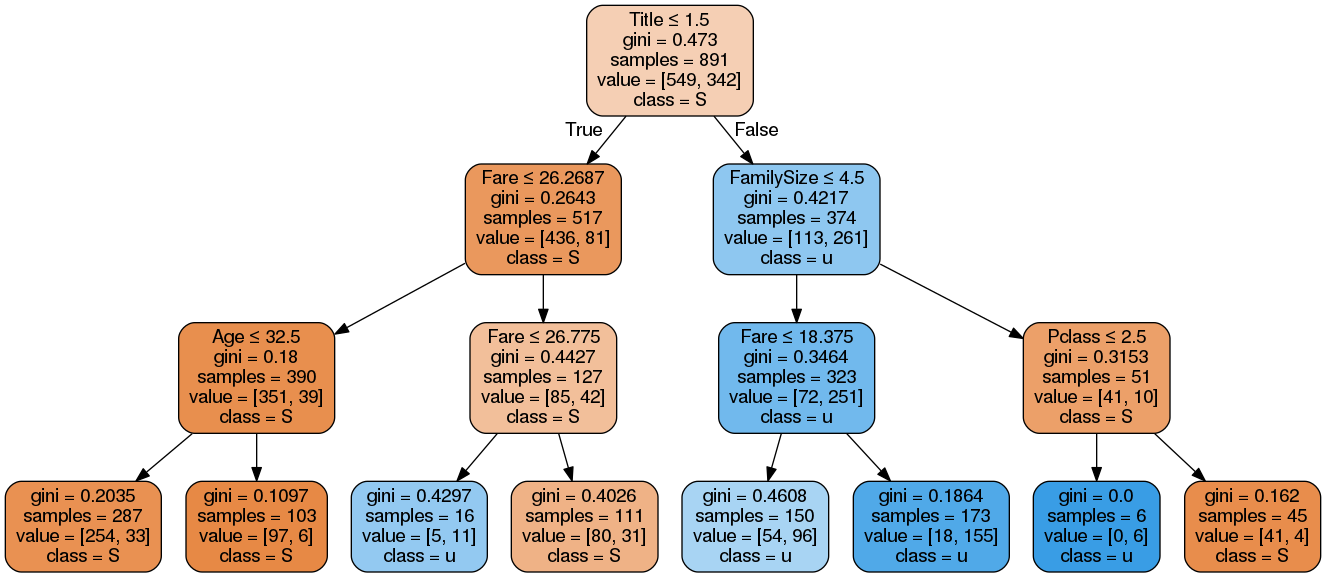

In [55]:
plot_decision_tree(clf,X_train.columns,df1.columns[1])

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer,accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [57]:
Y = titanic_train['Survived']
X = titanic_train.iloc[:,1:]

In [58]:
def grid_search_output(parameters,X,Y,clf):
    num_test = 0.20
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = num_test,random_state = 23)
    acc_scorer = make_scorer(accuracy_score)
    grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
    grid_obj = grid_obj.fit(X_train, Y_train)    
    return grid_obj.cv_results_

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
def plot_my_data(X,Ytest,Ytrain):
    if type(X.values()[0][0]) is str:        
        x = range(len(X.values()[0]))
        my_xticks = X.values()[0]
        plt.xticks(x, my_xticks)
        plt.plot(x,Ytest,'r-',x,Ytrain)
    else:
        plt.plot(X.values()[0],Ytest,'r-',X.values()[0],Ytrain)
    plt.xlabel(X.keys()[0])
    plt.ylabel('Mean Scores')
    plt.show()
    return plt

In [60]:
parameters1 = {'n_estimators': [2,4,6,8,16,32]}
parameters2 = {'max_features': ['log2', 'sqrt','auto']}
parameters3 = {'criterion': ['entropy', 'gini']}
parameters4 = {'max_depth': [2, 3, 5, 10]}
parameters5 = {'min_samples_split': [2, 3, 5]}
parameters6 = {'min_samples_leaf': [1,5,8]}

/home/bhavesh/anaconda2/lib/python2.7/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/bhavesh/anaconda2/lib/python2.7/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


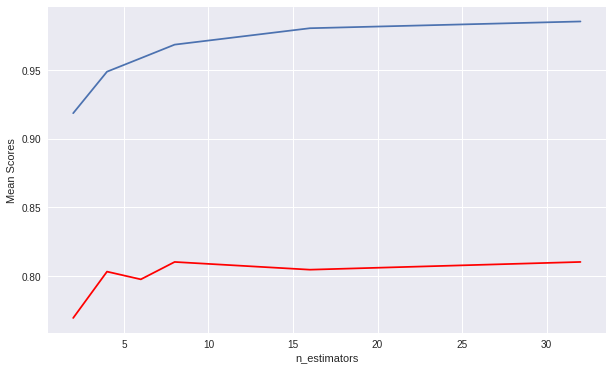

<module 'matplotlib.pyplot' from '/home/bhavesh/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

In [61]:
clf = RandomForestClassifier(oob_score=True)
t1 = grid_search_output(parameters1,X,Y,clf)
plot_my_data(parameters1,t1['mean_test_score'],t1['mean_train_score'])

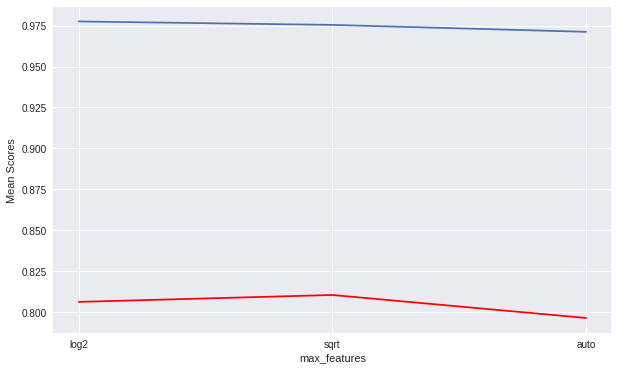

<module 'matplotlib.pyplot' from '/home/bhavesh/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

In [62]:
t2 = grid_search_output(parameters2,X,Y,clf)
plot_my_data(parameters2,t2['mean_test_score'],t2['mean_train_score'])

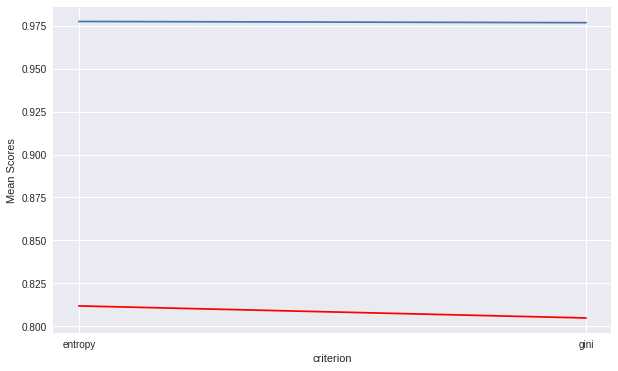

<module 'matplotlib.pyplot' from '/home/bhavesh/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

In [63]:
t3 = grid_search_output(parameters3,X,Y,clf)
plot_my_data(parameters3,t3['mean_test_score'],t3['mean_train_score'])

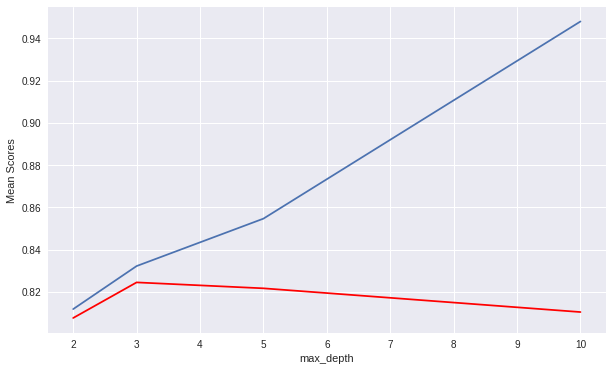

<module 'matplotlib.pyplot' from '/home/bhavesh/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

In [64]:
t4 = grid_search_output(parameters4,X,Y,clf)
plot_my_data(parameters4,t4['mean_test_score'],t4['mean_train_score'])

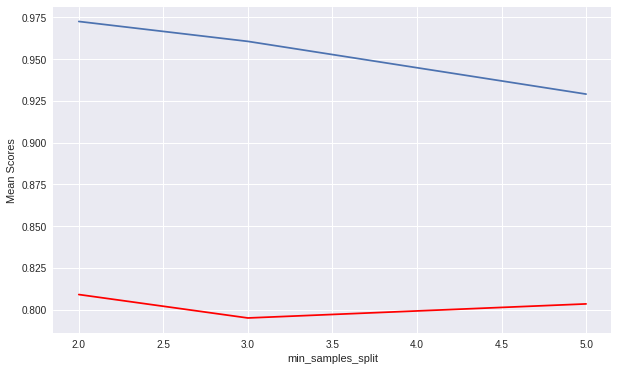

<module 'matplotlib.pyplot' from '/home/bhavesh/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

In [65]:
t5 = grid_search_output(parameters5,X,Y,clf)
plot_my_data(parameters5,t5['mean_test_score'],t5['mean_train_score'])

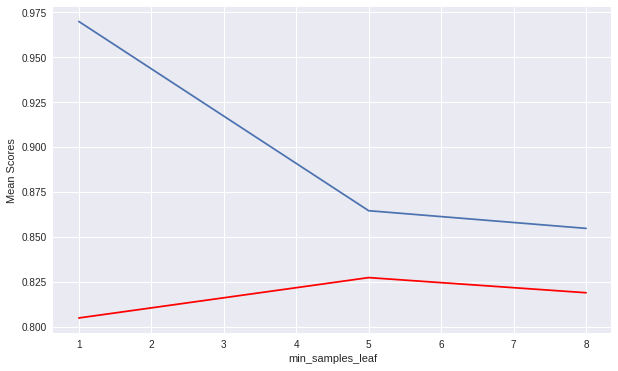

<module 'matplotlib.pyplot' from '/home/bhavesh/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

In [66]:
t6 = grid_search_output(parameters6,X,Y,clf)
plot_my_data(parameters6,t6['mean_test_score'],t6['mean_train_score'])

In [67]:
clf1 = RandomForestClassifier(n_estimators=15,criterion='gini',min_samples_leaf=5, max_depth=5,max_features='sqrt')

In [68]:
clf1 = clf1.fit(X_train,Y_train)
Y_pred_random_forest = clf1.predict(titanic_test.iloc[:,1:])
df_random = DataFrame(np.array([titanic_test.iloc[:,0],Y_pred_random_forest]).T,columns=['PassengerId','Survived'])
df_random.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [69]:
df_random.to_csv('prediction_random_forest.csv',index=False)